In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       # analysis tool
from sklearn.model_selection import train_test_split

In [0]:
# Prepare dataset

cars_customers_data = spark.read.table("workspace.default.new_cleaned_carscustomer_data_pradeep")

df_table=cars_customers_data.toPandas()
df = pd.DataFrame(df_table)
df.head()

#print("Dataset", df)

,TotalChildren,NumberChildrenAtHome,NumberOfPurchases,ProfitGenerated,Age,MaritalStatus_ S,YearlyIncome_ 25001-50000,YearlyIncome_ 50001-75000,YearlyIncome_ 75001-100000,YearlyIncome_ greater than 100000,Gender_ M,Education_ Graduate Degree,Education_ High School,Education_ Partial College,Education_ Partial High School,Occupation_ Management,Occupation_ Manual,Occupation_ Professional,Occupation_ Skilled Manual,HomeOwner_ True,CommuteDistance_ 1-2 Miles,CommuteDistance_ 10+ Miles,CommuteDistance_ 2-5 Miles,CommuteDistance_ 5-10 Miles
0,1.705840,2.554599,2.753732,-0.239634,-0.658761,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
1,-1.207835,-0.704899,-1.253591,1.456773,-0.405635,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
2,0.540370,1.250800,-0.251760,-0.365055,-0.321260,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1.123105,1.902699,0.750071,0.448947,-0.321260,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4,-1.207835,-0.704899,-1.253591,1.714110,-0.321260,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1


In [0]:
#df.columns
#df.columns = df.columns.str.strip()
#df.head()

In [0]:
#df = df.drop(['CustomerID', 'FirstName', 'MiddleName', 'LastName', "ProfitGenerated"], axis=1)  

In [0]:
#display(df.BirthDate)

#df['BirthDate'] = pd.to_datetime(df['BirthDate'])
#df['BirthDate'] = 2025 - df['BirthDate'].dt.year
#df['birth_month'] = df['birthdate'].dt.month  # optional seasonality signal

#df['BirthDate']

In [0]:
#def convert_categorical_to_numerical(df):
 #   for column in df.columns:
 ####       if df[column].dtype == 'object':
    #        df[column] = df[column].astype('category')
    #        df[column] = df[column].cat.codes
    #    mapping = dict(zip(df[column], range(len(df[column]))))
    #print("Category → Code Mapping:", df[column])


    #return df 
# Call the function to convert categorical columns to numerical columns

#df = convert_categorical_to_numerical(df)
#display(df)

In [0]:
y = df['ProfitGenerated'].values.reshape(-1, 1)
X = df.drop(['ProfitGenerated'], axis=1)


y = y.reshape(len(y), 1)


print(X)
print(y)

      TotalChildren  ...  CommuteDistance_ 5-10 Miles 
0          1.705840  ...                             0
1         -1.207835  ...                             1
2          0.540370  ...                             0
3          1.123105  ...                             0
4         -1.207835  ...                             1
...             ...  ...                           ...
9995      -1.207835  ...                             0
9996      -1.207835  ...                             0
9997      -0.625100  ...                             0
9998      -0.625100  ...                             0
9999      -0.042365  ...                             0

[10000 rows x 23 columns]
[[-0.23963426]
 [ 1.45677255]
 [-0.3650551 ]
 ...
 [-1.17382118]
 [-1.26038076]
 [-1.21080065]]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

print(X)
print(y)

      TotalChildren  ...  CommuteDistance_ 5-10 Miles 
0          1.705840  ...                             0
1         -1.207835  ...                             1
2          0.540370  ...                             0
3          1.123105  ...                             0
4         -1.207835  ...                             1
...             ...  ...                           ...
9995      -1.207835  ...                             0
9996      -1.207835  ...                             0
9997      -0.625100  ...                             0
9998      -0.625100  ...                             0
9999      -0.042365  ...                             0

[10000 rows x 23 columns]
[[-0.23963426]
 [ 1.45677255]
 [-0.3650551 ]
 ...
 [-1.17382118]
 [-1.26038076]
 [-1.21080065]]


In [0]:
# Train the SVR model on the dataset

from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

/databricks/python/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [0]:
# Predicting a new dataset
#svr_model.predict(sc_X.transform([[20]]))
# Predicting a new result
y_pred = sc_y.inverse_transform(svr_model.predict(sc_X.transform(X_test)).reshape(-1, 1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

print(y_pred)


[[-0.09  0.01]
 [-0.64 -0.74]
 [-0.26 -0.25]
 ...
 [-1.12 -1.1 ]
 [-0.94 -1.03]
 [ 0.29  0.32]]
[[-0.09]
 [-0.64]
 [-0.26]
 ...
 [-1.12]
 [-0.94]
 [ 0.29]]


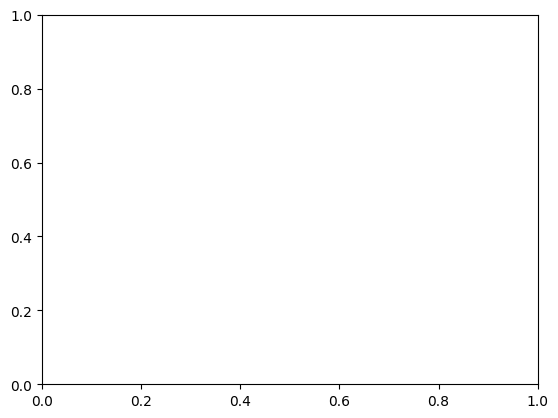

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-8520219615085701>, line 1
----> 1 plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(-1, 1)), color = 'red')
      2 plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svr_model.predict(X).reshape(-1, 1)), color = 'blue')
      3 #plt.plot(X, y_pred, color = 'blue')

File /databricks/python/lib/python3.11/site-packages/matplotlib/pyplot.py:2862, in scatter(x, y, s, c, marker, cmap, norm, vmin, vmax, alpha, linewidths, edgecolors, plotnonfinite, data, **kwargs)
   2857 @_copy_docstring_and_deprecators(Axes.scatter)
   2858 def scatter(
   2859         x, y, s=None, c=None, marker=None, cmap=None, norm=None,
   2860         vmin=None, vmax=None, alpha=None, linewidths=None, *,
   2861         edgecolors=None, plotnonfinite=False, data=None, **kwargs):
-> 2862     __ret = gca().scatter(
   2863   

In [0]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(-1, 1)), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svr_model.predict(X).reshape(-1, 1)), color = 'blue')
#plt.plot(X, y_pred, color = 'blue')
plt.title('SVR')
plt.xlabel('Age')
plt.ylabel('Number of Purchases')
plt.show()

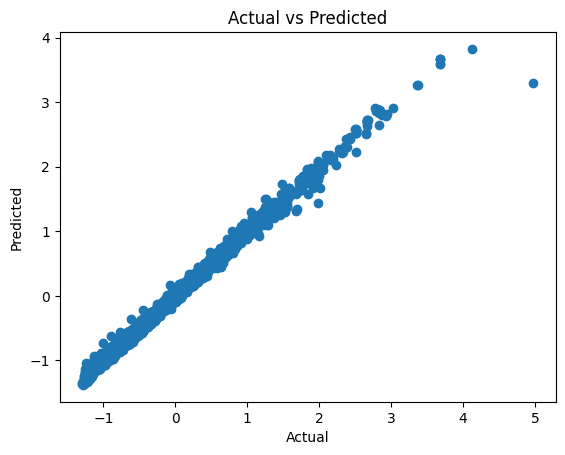

In [0]:
# Graphical representation of the model
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9934465742253921